## 8.5 의사결정나무

### 8.5.1 버섯 데이터 세트

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import requests, zipfile 
import io

# 데이터 수집
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data' 
res = requests.get(url).content
# 수집한 데이터를 DataFrame 객체로 읽어 들이기
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
# 데이터 컬럼에 레이블 설정
mushroom.columns =['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                   'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape', 'stalk_root','stalk_surface_above_ring',
                   'stalk_surface_below_ring', 'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color', 'ring_number',
                   'ring_type','spore_print_color','population','habitat']
# 처음 다섯 행 출력 
# mushroom.head()

In [2]:
print("데이터 형태 : {}".format(mushroom.shape))
print("결측값 수 : {}".format(mushroom.isnull().sum().sum()))

데이터 형태 : (8124, 23)
결측값 수 : 0


In [3]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor', 'cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [4]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [5]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [6]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [7]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482)) 
print('독버섯 데이터 엔트로피 초깃값: {:.3f}'.format(entropy_init))

독버섯 데이터 엔트로피 초깃값: 0.999


In [8]:
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2)) 
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


### 8.5.5 의사결정 모델 구축

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [12]:
print('정확도(train):{:.3f}'.format(model.score(X_train, y_train))) 
print('정확도(test):{:.3f}'.format(model.score(X_test, y_test)))

정확도(train):0.879
정확도(test):0.891


In [13]:
from sklearn import tree
import pydotplus
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image

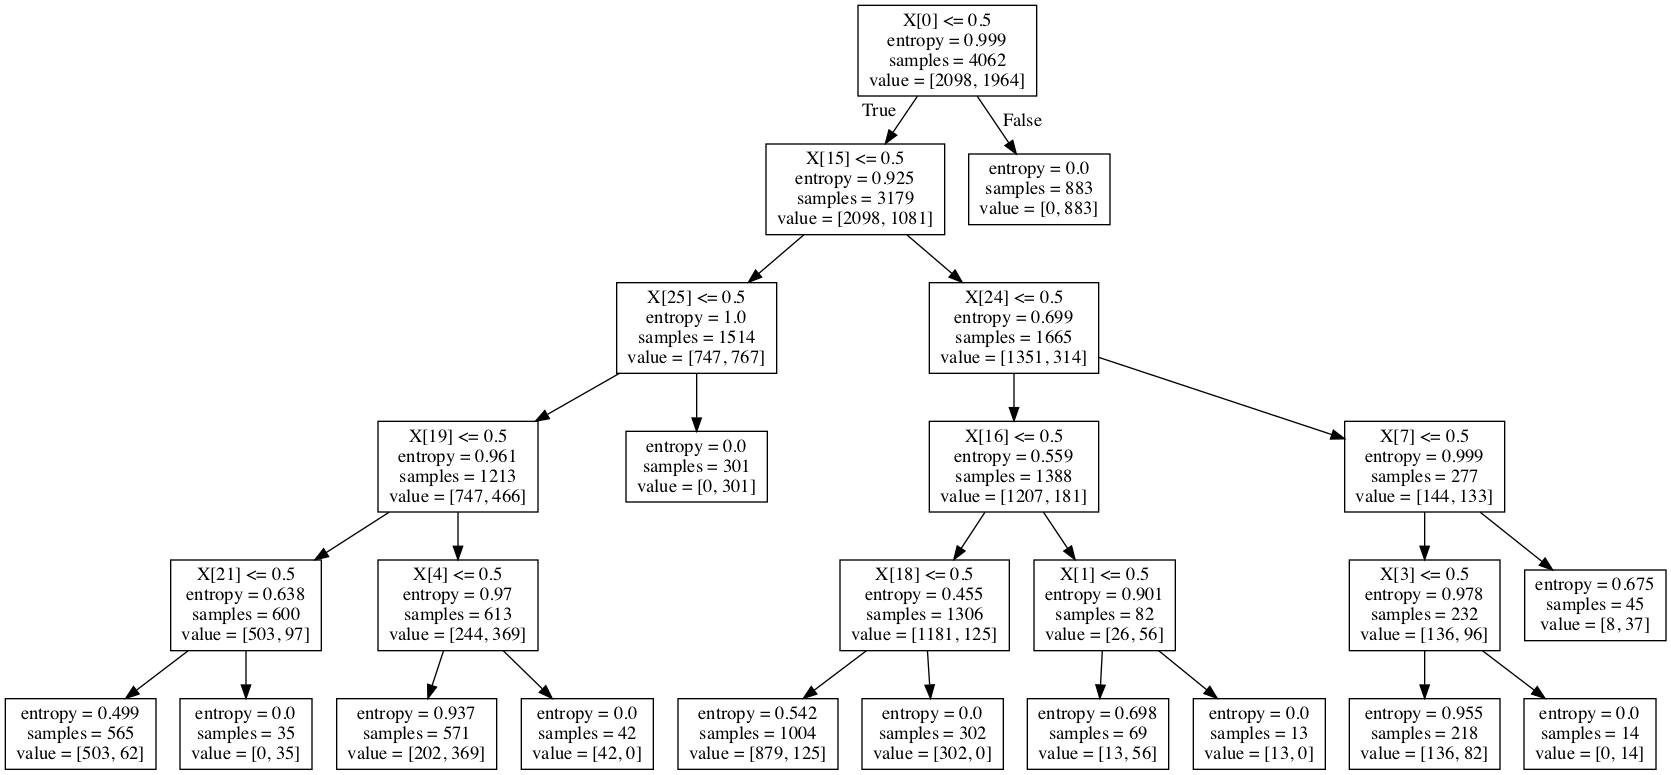

In [14]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())